# Advanced Machine Learning - programming assignment 3

*Due: Friday January 12*

*Grading: 10 points total*

**Please fill in:**
* Samuele Milanese (1907816)
* Riccardo Campanella (8175721)

### Further instructions:
* Code quality is considered during the assessment. Use sensible variable names, and make sure your code is properly commented.
* Submit your code in Blackboard using one of your accounts; we will put the grade in Blackboard for the other team member as well.
* Make sure to name the submitted file according to your and your collaborators last name. (`submitter_collaborator.ipynb`)
* **Failure to follow these instructions can affect the assignment grade.**

## Structural causal models
In this programming assignment, we will look at data from a structural causal model, and see how we can estimate the causal effect of $X$ on $Y$ from these data. The model consists of three variables:

* $X$ is the treatment: the dosage of a drug taken by a patient;
* $Y$ is the outcome: a numerical score reflecting how well the patient recovered;
* $Z$ is an additional variable that summarizes relevant genetic information about a patient.

$Y$ and $Z$ are continuous (real-valued), while $X$ is discrete.

The following code generates and plots observational data from this model.

In [ ]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# The following three functions implement the structural equations of an SCM with three
# endogenous variables X, Y, and Z. Each endogenous variable in this SCM has one exogenous
# parent (unnamed) whose value is sampled by the corresponding function. Each of these
# functions operates on numpy arrays of length num_samples, where num_samples is the
# number of data points.
def f_Z(num_samples):
    return 4 * np.random.random(size=num_samples) + 4 * np.random.random(size=num_samples)
def f_X(z, num_samples):
    x_cont = z + np.random.normal(loc=0.0, scale=1.0, size=num_samples)
    return np.clip(2 * np.around(0.5 * (x_cont)), 0, 10).astype(dtype=int)
def f_Y(z, x, num_samples):
    return 2*z - x + np.random.normal(loc=0.0, scale=0.4, size=num_samples)

# Generate data from the observational distribution.
def generate_observational_data(num_samples):
    z = f_Z(num_samples)
    x = f_X(z, num_samples)
    y = f_Y(z, x, num_samples)
    return (x, y, z)

num_samples_obs = 1000

x, y, z = generate_observational_data(num_samples_obs)

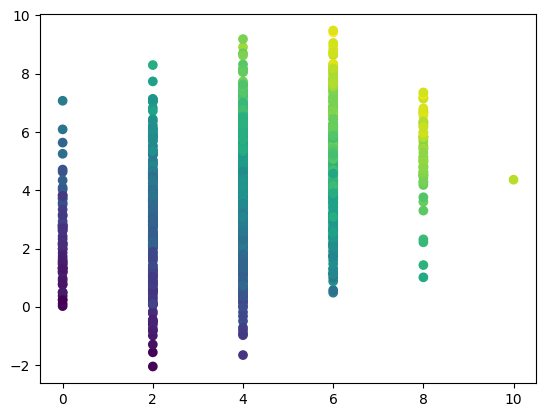

In [ ]:
plt.scatter(x, y, c=z)
plt.show()

**Task 1 (1 point):** Use any supervised learning method of your choice to fit a function from $X$ to $Y$ to these data. (So $X$ is the only feature; $Z$ is not used. Note that you are *not* asked to validate or test your fit here.) Make a new plot that displays both the data points and your fitted function, for $x$ in the range $[0,10]$.


To plot a regression curve, first use a function like `np.linspace` to create an array of neatly ordered x-values. Then have your trained machine learning model predict the y-values corresponding to those x-values.

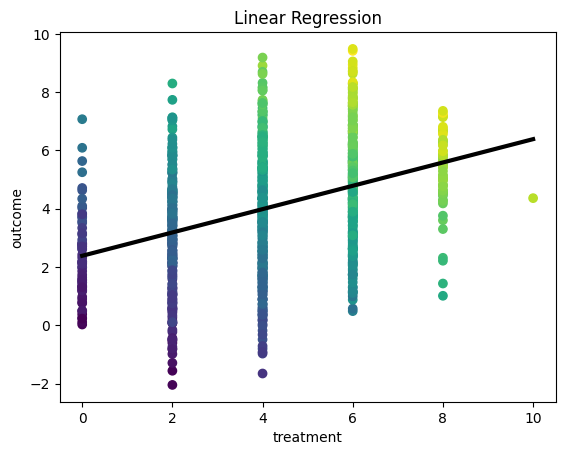

In [ ]:
# Your code here
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# create 1000 neatly (evenly spaced) ordered values between min (0) and max (10) to have a smooth plot
x_values_obs = np.linspace(0, 10, num_samples_obs).reshape(-1, 1)

model = LinearRegression()
model .fit(x, y)
y_pred_obs = model.predict(x_values_obs)

# scatter plot of observational data
plt.scatter(x, y, c=z)

# regression curve
plt.plot(x_values_obs, y_pred_obs, color='black', linewidth=3)
plt.title("Linear Regression")
plt.xlabel("treatment")
plt.ylabel("outcome")
plt.show()


Look at the code of `f_X`, `f_Y`, `f_Z`, and `generate_observational_data` to answer the following questions.

**Question 2 (1 point):** For each endogenous variable, what other endogenous variables are the direct causes? For each such relation between two variables, explain what the presence of this relation means in the real world, where the three variables represent treatment, outcome, and genetic information.

**Answer:**

By looking at the equations in the SCM, the endogenous variable X is defined with respect to Z, the variable Y with respect to either X and Z, and the variable Z is the weighted sum of two random samples from a normal distribution. The reason is that a treatment outcome (Y) depends on the the patient's genetic informations (Z) that change randomly at uniform among different subjects and the the drug dosage of a treatment (X) which might vary based on patient's genetic informations. As result, if we draw the corresponding graph, X and Z are directly causing Y, Z is directly causing X but neither X nor Y are directly causing Z.

Z ----------> Y

Z --> X --> Y

or

Z -> Y <- X <- Z

and

Ux -> X, Uy -> Y, Uz -> Z



## Intervening on the system

Now we will consider what happens if we intervene on the system by prescribing certain dosages of the drug.

**Task 3 (1 point):** Complete the following function, which is analogous to the function `generate_observational_data`, except now instead of observational data, each data point $(x_i, y_i, z_i)$ should be generated from the interventional distribution with $do(X=x_i)$. The values $x_i$ are specified by the array `x`, which is the first argument of this function.

In [ ]:
def generate_experimental_data(x, num_samples):
    # Generate data under intervention do(X=x[i]). x is a vector of length num_samples.
    # Your code here
    # return (x, y, z)

    # Generate Z values (genetic information) from the interventional distribution
    z = f_Z(num_samples)

    # Generate X values based on the specified intervention do(X=x[i])
    x_intervention = np.full_like(x, fill_value=x)  # Replicate x[i] for all samples

    # Generate Y values based on the interventional distribution
    y = f_Y(z, x_intervention, num_samples)

    return (x_intervention, y, z)

We will look at interventional data where for each data point, the dosage is chosen uniformly at random from the set $\{0,2,4,8\}$, independently for each individual.

In [ ]:
num_samples_exp = 200

# Set the values of x according to the distribution specified above, then generate the whole data
# under the intervention do(X=x).
x_exp = np.random.choice(np.array([0, 2, 4, 8], dtype=int), size=num_samples_exp)
(x_exp, y_exp, z_exp) = generate_experimental_data(x_exp, num_samples_exp)

**Task 4 (0.5 points):** Plot these experimental data in the same way as before, again including the curve you fit earlier to the observational data.

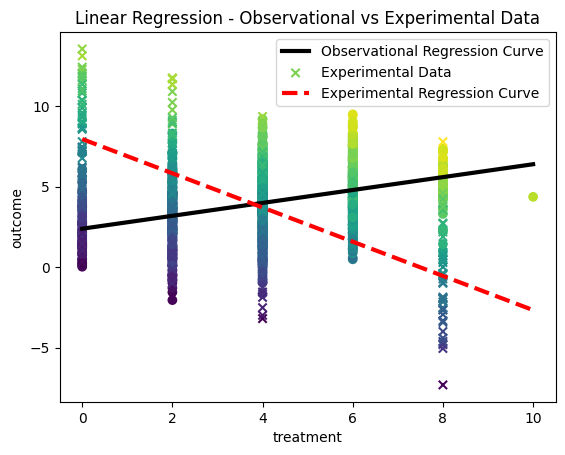

In [ ]:
# Your code here

# Fit the linear regression model to the experimental data
x_values_exp = np.linspace(0, 10, num_samples_exp).reshape(-1, 1)

model.fit(x_exp.reshape(-1, 1), y_exp.reshape(-1, 1))
y_pred_exp = model.predict(x_values_exp.reshape(-1, 1))

# scatter plot for observational data
plt.scatter(x, y, c=z)

# Regression curve for observational data
plt.plot(x_values_obs, y_pred_obs, color='black', linewidth=3, label="Observational Regression Curve")

# scatter plot for experimental data
plt.scatter(x_exp, y_exp, c=z_exp, marker='x', label="Experimental Data")

# Regression curve for experimental data
plt.plot(x_values_exp, y_pred_exp, color='red', linestyle='dashed', linewidth=3, label="Experimental Regression Curve")

plt.title("Linear Regression - Observational vs Experimental Data")
plt.xlabel("treatment")
plt.ylabel("outcome")
plt.legend()
plt.show()


**Task 5 (0.5 points):** Compute the RMSE (root mean squared error) when you use the regression curve you learned earlier to predict $Y$ in these new data. (To put it another way: we used the observational data as training data, and now we are using the experimental data as test data.)

In [ ]:
# Your code here
from sklearn.metrics import mean_squared_error

rmse_exp_obs = np.sqrt(mean_squared_error(y_exp, y_pred_exp))
print("Root Mean Squared Error using the observational model on experimental data:", rmse_exp_obs)

rmse_obs = np.sqrt(mean_squared_error(y, y_pred_obs))
print("Root Mean Squared Error using the observational model on observational data:", rmse_obs)

print(f"Difference between the two MSEs: {np.around(rmse_exp_obs - rmse_obs)}")

Root Mean Squared Error using the observational model on experimental data: 5.778815671821153
Root Mean Squared Error using the observational model on observational data: 2.3952849180088647
Difference between the two MSEs: 3.0


You should see in your plot that the curve we learned from the observational data, does not seem to work well for predicting the outcome $Y$ in the interventional data. This is because the experimental distribution is different from the observational distribution.

**Question 6 (1 point):** Look at the product decompositions of the original SCM and the SCM modified by the intervention on $X$. Which factors in the decompositions are the same between the observational and the experimental distribution? And what conditional distribution (which may or may not appear in either product decomposition) needs to stay the same between the two distributions, in order for your fitted curve to also give good predictions on the experimental data?


In the experimental graph, we need to cancel the arrows coming in and out of the variable on which we intervened, in this case X. Since X was a direct cause of Y, its decomposition now does not need to take into consideration P(X = x) as this is fixed to $x_i$. Hence, the only factors which remains unchanged is P(Z) which is not caused by X.

Since we used a Linear Regression model to predict the treatment outcome on the experimental data, this supervised learning method works with estimating probabilities, hence the relationship between X and Y must be consistent under the observational and experimental data. In particular, the conditional distribution (P(Y | X)) of the outcome variable (Y) given the treatment (X) must be the same bewteen the two conditions. This means that our model's coefficient and parameters should be robust to the intervention on X such that even if our model is trained (fit) on observational data, it is then able to generalize well with experimental data thus leading to accurate predictions.

Finally, by looking at the MSEs we can conclude that the Linear Reghression Model is generalizing well on new conditions introduced by the intervention as we observe a small difference between the two errors of around 3%.

**Question 7 (1.5 points):** What (marginal or conditional) independence should hold in the experimental data, based on d-separation? Plot the data in a way that illustrates this independence, and explain what property of the plot illustrates the independence.

After the intervention on X the pairs X,Y result not be conditional independent, however all the other pairs of nodes in the graphs result marginally independent. By plotting the data points, sparse data indicates independence.

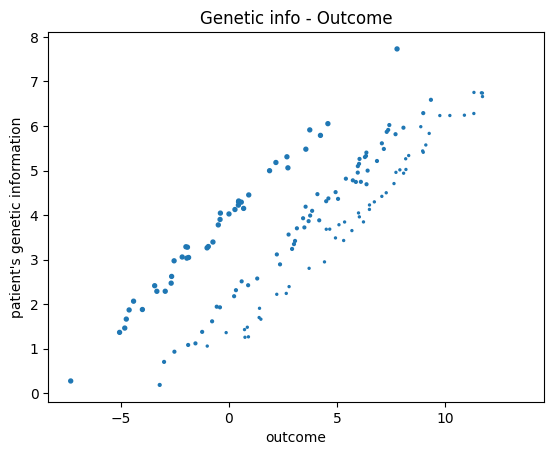

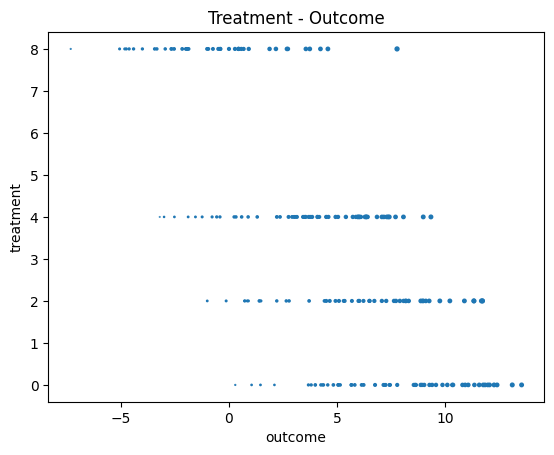

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


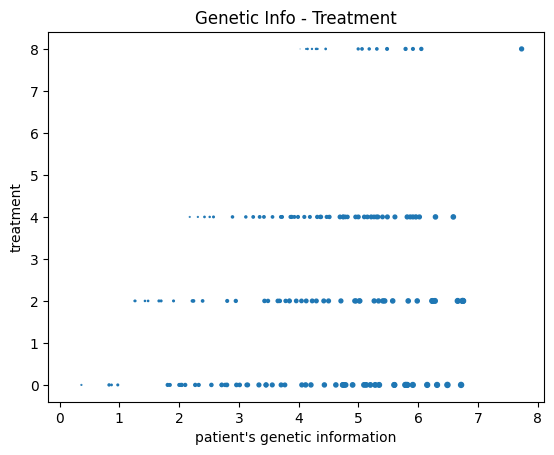

In [ ]:
# Your code here
plt.scatter(y_exp, z_exp, x_exp)
plt.title("Genetic info - Outcome")
plt.xlabel("outcome")
plt.ylabel("patient's genetic information")
plt.show()

plt.scatter(y_exp, x_exp, z_exp)
plt.title("Treatment - Outcome")
plt.xlabel("outcome")
plt.ylabel("treatment")
plt.show()

plt.scatter(z_exp, x_exp, y_exp)
plt.title("Genetic Info - Treatment")
plt.xlabel("patient's genetic information")
plt.ylabel("treatment")
plt.show()

**Task 8 (2 points):** Now, we will use the method of inverse probability weighing (section 3.6 in the book, covered in lecture 12) for this task. Using *only the observational data*, fit a logistic regression to predict $X$ using $Z$ as a feature. From this logistic regression, extract an estimate of $P(X=x_i|Z=z_i)$ for each data point $(x_i, y_i, z_i)$. (Consult the scikit-learn manual to learn how to do this.) Use these to compute an inverse probability weight for each data point in the observational data set.

Important note: the purpose of the logistic regression is *not* to predict the value of $X$, because we already know that value for each data point! But we do need the logistic regression to esimate the probability $P(X=x_i|Z=z_i)$.

In [ ]:
# Create logistic regression object (using scikit-learn)
reg_logistic = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)

# Your code here
reg_logistic.fit(z.reshape(-1, 1), x.flatten())

probs = reg_logistic.predict_proba(z.reshape(-1, 1))
weights = np.asarray([p[x[i]//2] for i, p in enumerate(probs)]) # select only x_i

**Task 9 (1 point):** Now again predict $Y$ in terms of $X$ using only the observational data as training data, but this time weigh each data point with the inverse probability weight. (Machine learning libraries often provides a way to specify a weight for each data point when fitting a model to data; check the manual of the library you are using.) Plot your regression curve in the same plot as the experimental data, as before.

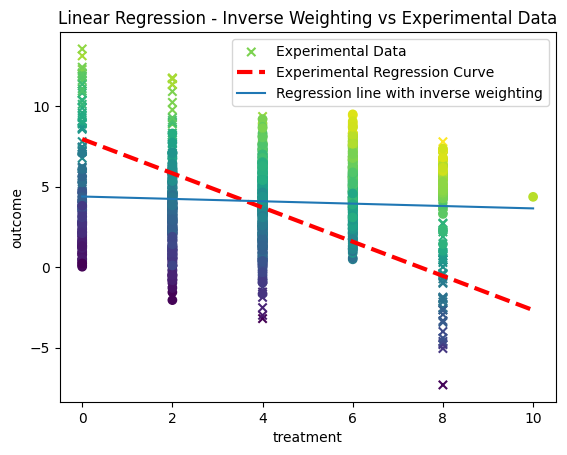

In [ ]:
# Your code here
inv_model = LinearRegression()
inv_model.fit(x, y, (1/weights).flatten())
y_pred_inv = inv_model.predict(x_values_exp)

plt.scatter(x_exp, y_exp, c=z_exp, marker='x', label="Experimental Data")
plt.scatter(x, y, c=z)

# Regression curve for experimental data
plt.plot(x_values_exp, y_pred_exp, color='red', linestyle='dashed', linewidth=3, label="Experimental Regression Curve")
plt.plot(x_values_exp, y_pred_inv, label="Regression line with inverse weighting")


plt.title("Linear Regression - Inverse Weighting vs Experimental Data")
plt.xlabel("treatment")
plt.ylabel("outcome")
plt.legend()
plt.show()

**Task 10 (0.5 points):** To verify that these predictions of the causal effect of $X$ on $Y$ are more accurate, again compute the RMSE on the experimental data.

In [ ]:
# Your code here
rmse_obs = np.sqrt(mean_squared_error(y_exp, y_pred_inv))
print("Root Mean Squared Error using the inverse weighting model on experimental data:", rmse_obs)
print("Root Mean Squared Error using the observational model on experimental data:", rmse_exp_obs)

Root Mean Squared Error using the inverse weighting model on experimental data: 4.489597998706989
Root Mean Squared Error using the observational model on experimental data: 5.778815671821153


You are almost done! Before handing in, make sure that the code you hand in works, and that all plots are shown. **Submit just one file per team.** Name the submitted file according to your and your collaborator's last name (`submitter_collaborator.ipynb`).